In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import pearsonr
import seaborn as sns

In [3]:
df= pd.read_csv("data.csv")

In [56]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,0.067052,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,60,10,18810 Densmore Ave N,Shoreline
1,0.510711,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,94,2015,709 W Blaine St,Seattle
2,0.073265,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,49,2015,26206-26214 143rd Ave SE,Kent
3,0.089974,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,52,2015,857 170th Pl NE,Bellevue
4,0.117823,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,39,23,9105 170th Ave NE,Redmond


In [5]:
df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


Droping coloumns

In [6]:
df=df.drop(['date','statezip','country'],axis=1)

In [7]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle


Normalizing price

In [8]:
max=df["price"].max()
max

26590000.0

In [9]:
df["price"]=df['price']/max

Scatter plot between price and bedrooms : 

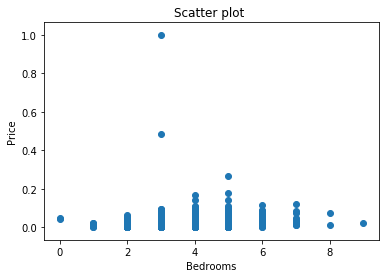

In [10]:
plt.scatter(df["bedrooms"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

Removing outliers :

In [11]:
df=df[df['price']<0.4]

In [12]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,0.011771,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline
1,0.089658,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle
2,0.012862,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent
3,0.015795,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue
4,0.020684,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.011590,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle
4596,0.020095,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue
4597,0.015679,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton
4598,0.007649,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle


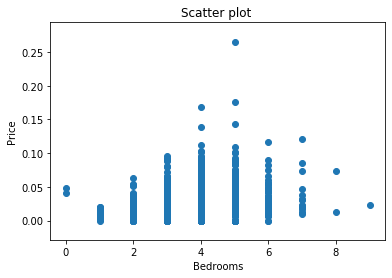

In [13]:
plt.scatter(df["bedrooms"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [14]:
df=df[df['price']<0.25]

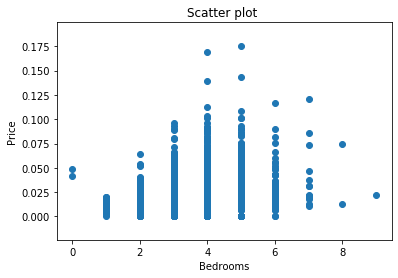

In [15]:
plt.scatter(df["bedrooms"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

De-Normalizing the price

In [16]:
df["price"]=df['price']*max

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle


Normalizing with new values

In [18]:
max=df["price"].max()
max

4668000.0

In [19]:
df["price"]=df['price']/max

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


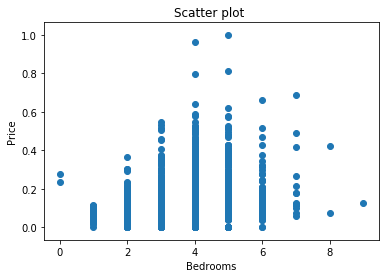

In [20]:
plt.scatter(df["bedrooms"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

Scatter plot between price and bathrooms : 

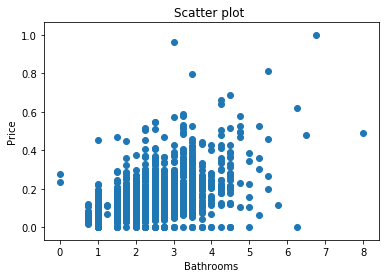

In [21]:
plt.scatter(df["bathrooms"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

Removing Outliers

In [22]:
df=df[df['bathrooms']<6]

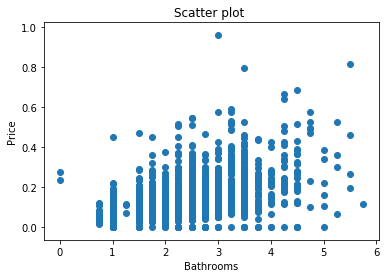

In [23]:
plt.scatter(df["bathrooms"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [24]:
df=df[df['price']<0.7]

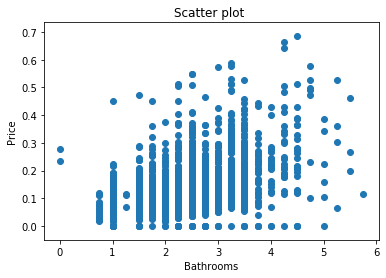

In [25]:
plt.scatter(df["bathrooms"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

Scatter plot between price and sqft_living

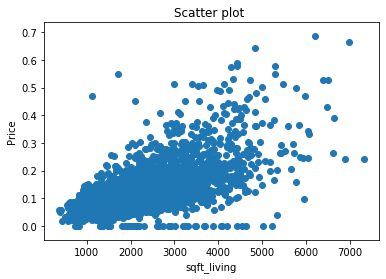

In [26]:
plt.scatter(df["sqft_living"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

Removing outliers

In [27]:
indexNames = df[ (df['price'] >0.4) & (df['sqft_living'] <=2000) ].index
 
df.drop(indexNames , inplace=True)

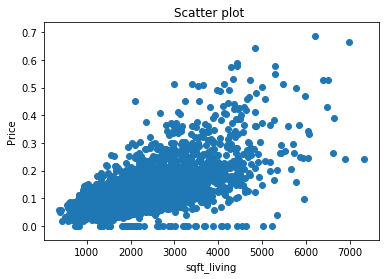

In [28]:
plt.scatter(df["sqft_living"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

Scatter plot between price and sqft_lot

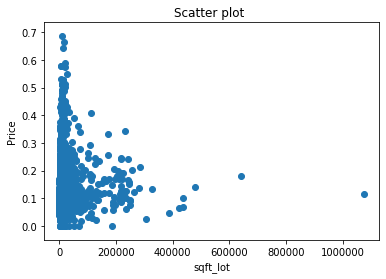

In [29]:
plt.scatter(df["sqft_lot"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.show()

In [30]:
df=df[df['sqft_lot']<40000]

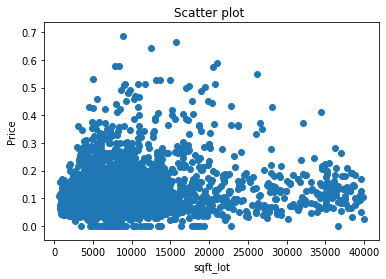

In [31]:
plt.scatter(df["sqft_lot"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.show()

Scatter plot between price and floors

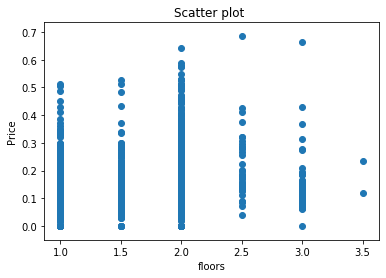

In [32]:
plt.scatter(df["floors"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

Removing outliers

In [33]:
indexNames = df[ (df['price'] >0.5) & (df['floors'] == 2.5) ].index
 
df.drop(indexNames , inplace=True)

In [34]:
indexNames = df[ (df['price'] >0.5) & (df['floors'] == 3.0) ].index
 
df.drop(indexNames , inplace=True)

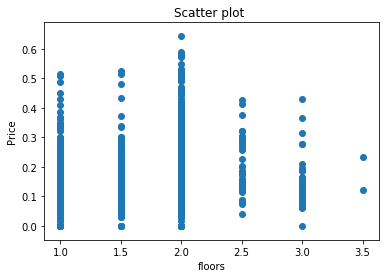

In [35]:
plt.scatter(df["floors"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

Scatter plot between price and Waterfont : 

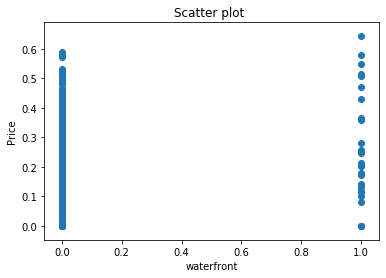

In [36]:
plt.scatter(df["waterfront"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.show()

Scatter plot between price and view : 

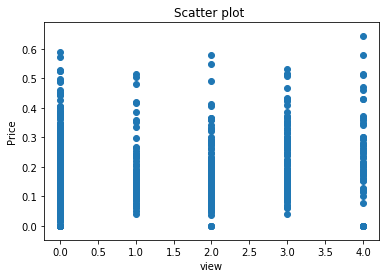

In [37]:
plt.scatter(df["view"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('view')
plt.ylabel('Price')
plt.show()

Scatter plot between price and condition : 

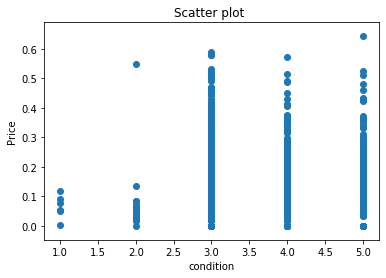

In [38]:
plt.scatter(df["condition"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('condition')
plt.ylabel('Price')
plt.show()

Removing outliers :

In [39]:
indexNames = df[ (df['price'] >0.5) & (df['condition'] == 2.0) ].index
 
df.drop(indexNames , inplace=True)

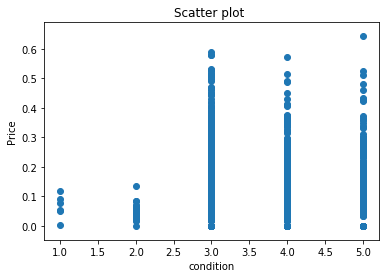

In [40]:
plt.scatter(df["condition"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('condition')
plt.ylabel('Price')
plt.show()

In [41]:
indexNames = df[ (df['price'] >0.6) & (df['condition'] == 5.0) ].index
 
df.drop(indexNames , inplace=True)

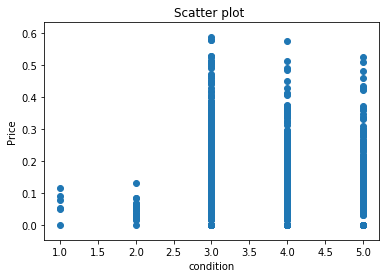

In [42]:
plt.scatter(df["condition"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('condition')
plt.ylabel('Price')
plt.show()

Scatter plot between price and sqft_above : 

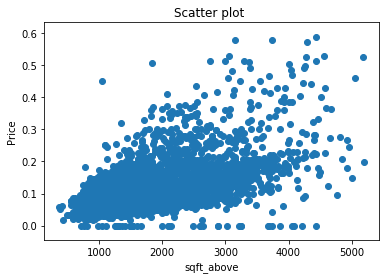

In [44]:
plt.scatter(df["sqft_above"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

In [45]:
indexNames = df[ (df['price'] >0.4) & (df['sqft_above'] <=2000) ].index
 
df.drop(indexNames , inplace=True)

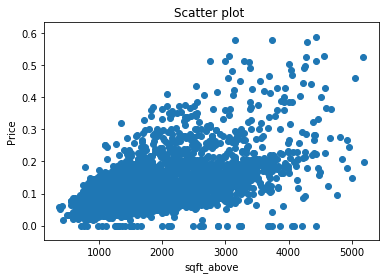

In [46]:
plt.scatter(df["sqft_above"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

Scatter plot between price and sqft_basement : 

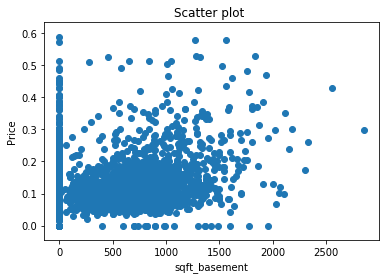

In [48]:
plt.scatter(df["sqft_basement"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.show()

Change year to number of years since the house have been built refernce to 2015 :


In [50]:
df['yr_built'] = 2015 - df['yr_built']

In [52]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,0.067052,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,60,2005,18810 Densmore Ave N,Shoreline
1,0.510711,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,94,0,709 W Blaine St,Seattle
2,0.073265,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,49,0,26206-26214 143rd Ave SE,Kent
3,0.089974,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,52,0,857 170th Pl NE,Bellevue
4,0.117823,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,39,1992,9105 170th Ave NE,Redmond


Scatter Plot between price and number of years :

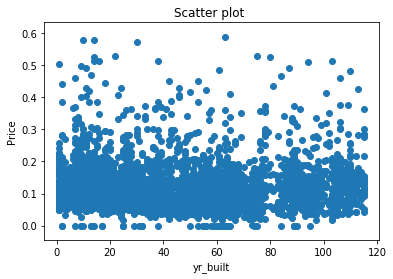

In [53]:
plt.scatter(df["yr_built"], df["price"])
plt.title('Scatter plot ')
plt.xlabel('yr_built')
plt.ylabel('Price')
plt.show()

City and area removed :

In [57]:
dp=df.drop(['city','street'],axis=1)

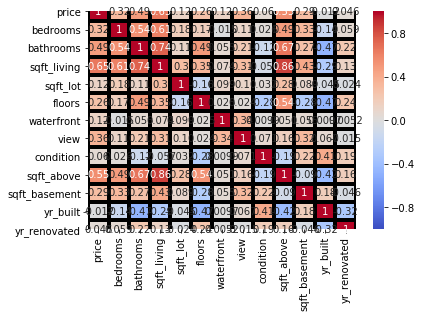

In [60]:
sns.heatmap(dp.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


In [61]:
dp=dp.drop(['yr_built','yr_renovated','condition','waterfront'],axis=1)

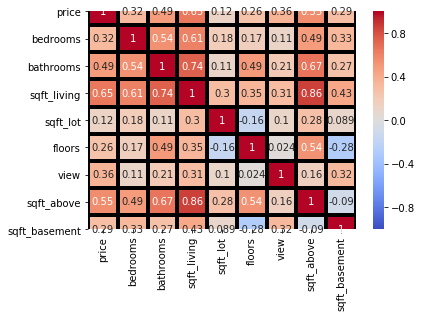

In [62]:
sns.heatmap(dp.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')



In [65]:
dp=dp.drop(['sqft_basement'],axis=1)

KeyError: "['sqft_basement'] not found in axis"

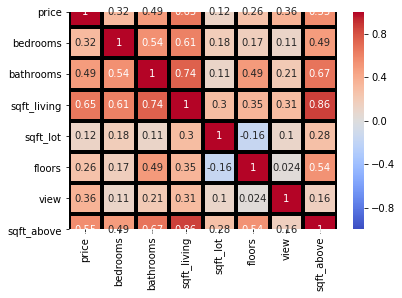

In [64]:
sns.heatmap(dp.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [66]:
dp=dp.drop(['sqft_lot'],axis=1)

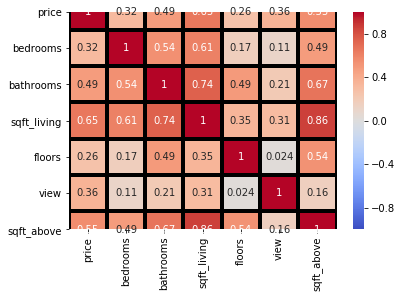

In [67]:
sns.heatmap(dp.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')